# CNN with the MNIST Dataset

Here, I build a simple convolutional neural network (CNN) to classify the MNIST digits dataset. I use the Keras API with the TensorFlow backend. I use the sequential model  with two convolutional layers and two max pooling layers. I then flatten the output of the second max pooling layer and use two dense layers to classify the digits. I use the Adam optimizer and the sparse categorial cross entropy loss function. 

In addition, I illustrate the raw data as both a matrix and as an image. I also illustrate the dataset sizes. Finally, I illustrate the accuracy and loss of the model as a function of the epoch number and a confusion matrix of the results.

Below is a diagram of the CNN model.

![CNN Model](pt2_cnn.png)

## Import Libraries

In [32]:
# import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


## Import MNIST Dataset

In [5]:
# import mnist data
data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [12]:
# split the data into test/train
x_train, y_train = data[0]
x_test, y_test = data[1]

In [14]:
# print the first value of x_train as a matrix
print('The first value of x_train as a matrix:')
print(x_train[0])


The first value of x_train as a matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   

The first value of x_train as an image:


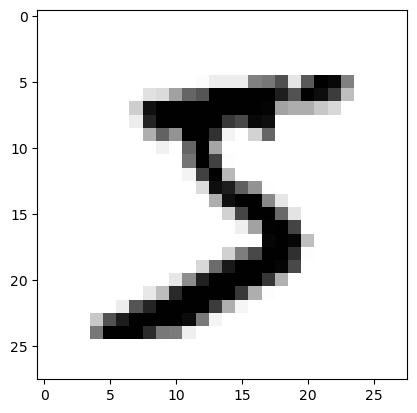

In [17]:
# print the first value of x_train as an image
print('The first value of x_train as an image:')
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


In [18]:
# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

## Build the CNN Model with Keras

In [45]:
# clear the session
tf.keras.backend.clear_session()

# initialize the model
cnn = keras.Sequential()

In [46]:
# add layers

# first convolutional layer
cnn.add(layers.Conv2D(
    filters=16, 
    kernel_size=(3, 3), 
    activation='relu', 
    input_shape=(28, 28, 1),
    padding='valid' # don't add padding, default value
))

# first pooling layer
cnn.add(layers.MaxPooling2D(
    pool_size=(2, 2)
))

# second convolutional layer
cnn.add(layers.Conv2D(
    filters=32, 
    kernel_size=(3, 3), 
    activation='relu',
    padding='valid' # don't add padding, default value
))

# second pooling layer
cnn.add(layers.MaxPooling2D(
    pool_size=(2, 2)
))

# flatten the data
cnn.add(layers.Flatten())

# add a dense layer
cnn.add(layers.Dense(
    units=128, 
    activation='relu'
))

# add an output layer
cnn.add(layers.Dense(
    units=10, 
    activation='softmax'
))

# compile the model
cnn.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

## Train the Model

In [28]:
# train the model
history = cnn.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
469/469 [==============================] - 15s 30ms/step - loss: 0.2679 - accuracy: 0.9272 - val_loss: 0.0659 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0630 - accuracy: 0.9814 - val_loss: 0.0438 - val_accuracy: 0.9849
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0433 - accuracy: 0.9871 - val_loss: 0.0346 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 5/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0330 - val_accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0306 - val_accuracy:

## Evaluate the Model

In [29]:
# evaluate the model
test_loss, test_accuracy = cnn.evaluate(x_test, y_test, verbose=1)
predictions = cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


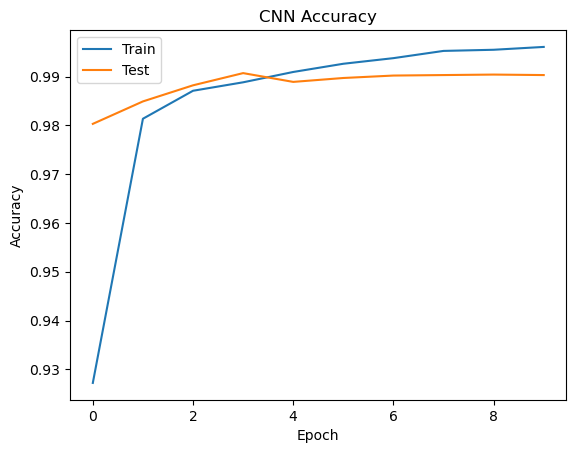

In [30]:
# visualize the accuracy and loss over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Confusion Matrix Values: 
 [[ 976    0    0    0    0    0    1    1    1    1]
 [   0 1129    4    2    0    0    0    0    0    0]
 [   0    0 1025    1    1    0    0    5    0    0]
 [   0    0    3 1005    0    2    0    0    0    0]
 [   0    1    0    0  975    0    1    0    0    5]
 [   2    0    1    8    0  877    1    0    1    2]
 [   2    5    0    1    2    2  944    0    2    0]
 [   0    2   10    3    0    0    0 1008    0    5]
 [   3    0    4    1    0    0    0    0  965    1]
 [   0    0    0    0    7    2    0    1    0  999]]


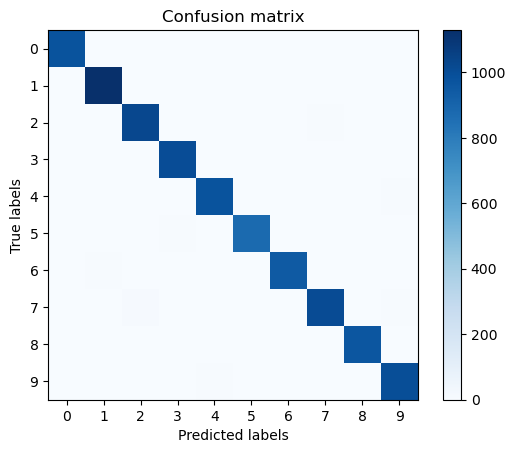

In [35]:
# create a confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
cm = confusion_matrix(y_test, predictions.argmax(axis=1))
print('Confusion Matrix Values: \n', cm)

# number of classes
num_classes = 10

# plot a pretty confusion matrix
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.title("Confusion matrix")
plt.colorbar()
plt.show()

## Ablation

To peer into our model, let's visualize some of the kernels and the feature maps they produce. We'll start with the first convolutional layer. We'll visualize the kernels as images and the feature maps as heatmaps. We'll also visualize the kernels and feature maps for the second convolutional layer.

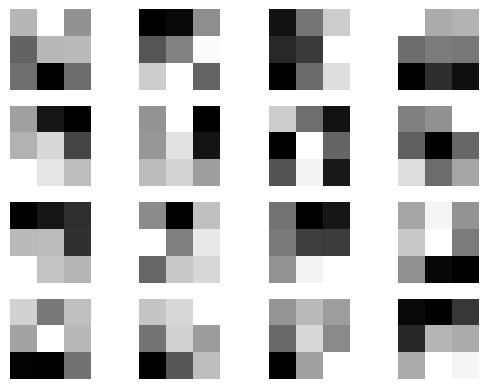

In [38]:
# visualize the first 16 kernels
# https://keras.io/examples/vision/visualizing_what_convnets_learn/
layer_name = 'conv2d'
filter_index = 0
layer = cnn.get_layer(name=layer_name)
layer_weights = layer.get_weights()[0]
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(layer_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()


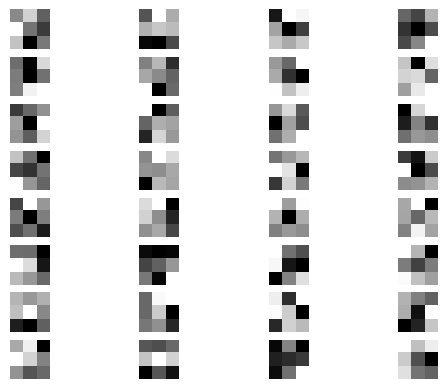

In [39]:
# visualize the 32 kernels from the second vonvolutional layer
# https://keras.io/examples/vision/visualizing_what_convnets_learn/
layer_name = 'conv2d_1'
filter_index = 0
layer = cnn.get_layer(name=layer_name)
layer_weights = layer.get_weights()[0]
for i in range(32):
    plt.subplot(8, 4, i + 1)
    plt.imshow(layer_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()

Now let's visualize what happens to a digit as it passes through the network. Below are a few feature maps from the first convolutional layer that show what happens to the input digit as its convolved and activated. We can see that the network is picking up on the edges of the digit.

1/1 [==============================] - 0s 62ms/step


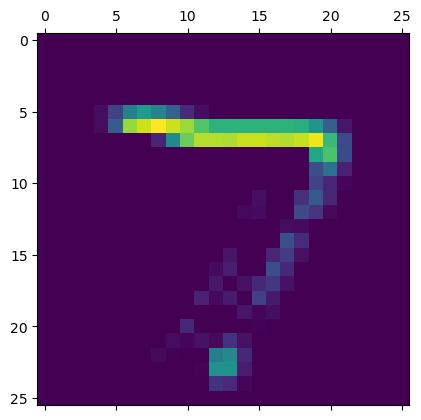

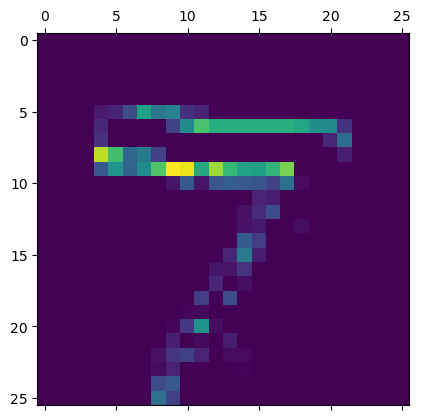

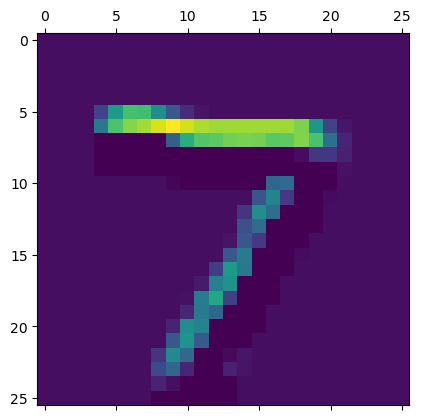

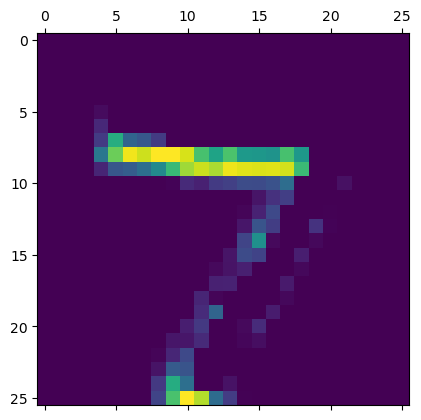

In [42]:
# https://keras.io/examples/vision/visualizing_what_convnets_learn/
layer_outputs = [layer.output for layer in cnn.layers[:4]]
activation_model = models.Model(inputs=cnn.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[0].reshape(1, 28, 28, 1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()
plt.matshow(first_layer_activation[0, :, :, 10], cmap='viridis')
plt.show()
plt.matshow(first_layer_activation[0, :, :, 13], cmap='viridis')
plt.show()



Now let's look at some of the outputs from the second convolutional layer. We can see that the network is picking up on the features of the digit.

1/1 [==============================] - 0s 61ms/step


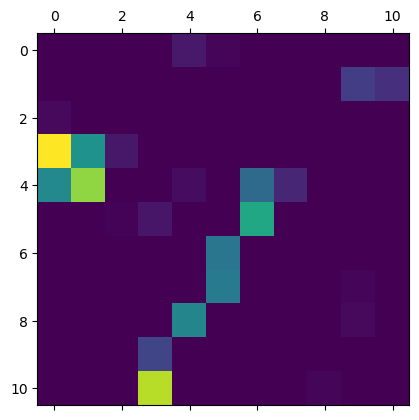

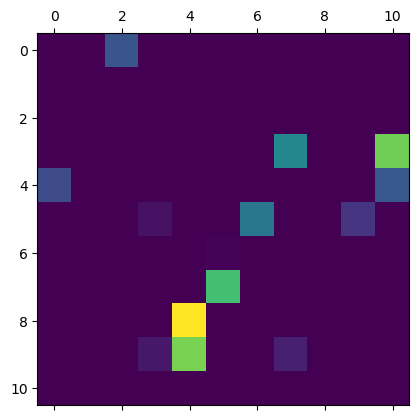

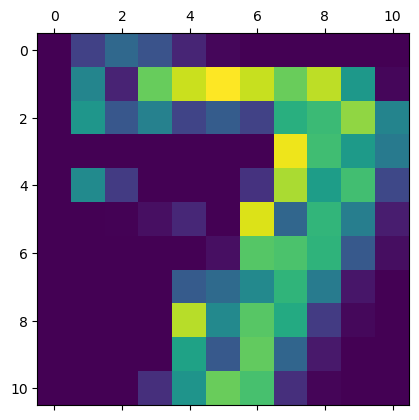

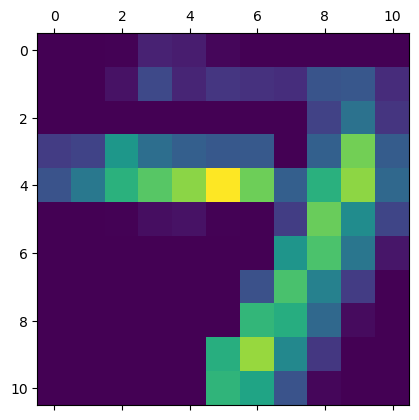

In [48]:
# visualize the outputs from the second convolutional layer
# https://keras.io/examples/vision/visualizing_what_convnets_learn/
layer_outputs = [layer.output for layer in cnn.layers[:4]]
activation_model = models.Model(inputs=cnn.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[0].reshape(1, 28, 28, 1))
second_layer_activation = activations[2]
plt.matshow(second_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()
plt.matshow(second_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()
plt.matshow(second_layer_activation[0, :, :, 10], cmap='viridis')
plt.show()
plt.matshow(second_layer_activation[0, :, :, 13], cmap='viridis')
plt.show()

[5.8614877e-08 1.2167108e-08 3.7052072e-05 1.5055715e-06 1.6702958e-10
 9.4504971e-10 6.8176821e-14 9.9995965e-01 9.1227825e-08 1.5394213e-06]
The model predicts this digit is a: 7
The actual digit is: 7


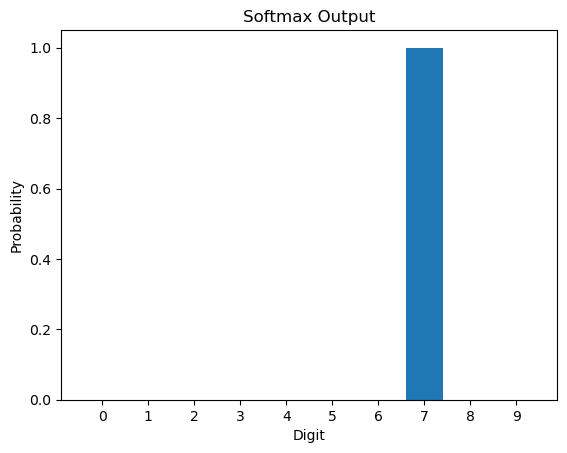

In [51]:
# look at the outputs of the softmax for this digit
print(predictions[0])
print('The model predicts this digit is a:', np.argmax(predictions[0]))
print('The actual digit is:', y_test[0])
plt.bar(np.arange(10), predictions[0])
plt.xticks(np.arange(10))
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Softmax Output')
plt.show()


## Results

Overall, the model achieves an accuracy of 99.03% on the test dataset. This is even better than the previous ANN architecturem which had an accuracy of 98.04%. Though it is just 1% better, the error rate has been halved, which is quite impressive. Even though this CNN model had one fewer dense layers than the ANN model (2 vs. 3), it still performed better. This is because the CNN model extracts spatial features with the kernels before flattening the data and passing it to the dense layers. There is more meaningful information in the data passed to the dense layers, which allows the model to perform better. That's pretty neat!

## Export as HTML Page

In [52]:
# export to HTML for webpage
import os

# os.system('jupyter nbconvert --to html mod1.ipynb')
os.system('jupyter nbconvert --to html pt2_cnn.ipynb --HTMLExporter.theme=dark')

[NbConvertApp] Converting notebook pt2_cnn.ipynb to html
[NbConvertApp] Writing 779251 bytes to pt2_cnn.html


0